# Hands-on: Deciphering Inka Khipu Signs

## Introduction

The purpose of this analysis is to examine whether anomalous Inka Khipu signs follows 
the Benford's Law (the law of anomalous numbers). 

The first part of the analysis uses population data in Census 2010. 
The second part of the analysis uses the Harvard Khipu database.

## Libraries and Functions

In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
import chart_studio.plotly as py
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
# Function to visualize the confidence interval
def plot_multi_proportion_confint_digits(actual_first_digit_frequencies, 
                                         actual_first_digit_counts, 
                                         expected_first_digit_frequencies,
                                         label_actual,
                                         label_expected,
                                         title
                                        ):
    # Import function-specific package: return array of lower and upper confidence levels for each category
    from statsmodels.stats.proportion import multinomial_proportions_confint
    
    # Plot 95% CIs as lines with caps on the top and bottom for easier interpretation
    plt.figure(figsize=(9,5))

    (_, caps, _) = plt.errorbar(x=np.arange(1, 10, 1), 
                     y=actual_first_digit_frequencies, 
                     yerr=[(top-bot)/2 for top,bot in multinomial_proportions_confint(actual_first_digit_counts)],
                     capsize=5, fmt='none', label=label_actual+' 95% CI')

    for cap in caps:
        cap.set_markeredgewidth(1)

    # Plot expected values as scatter plot points, in order to visualize where CIs include expected values
    plt.scatter(np.arange(1,10,1), expected_first_digit_frequencies, label=label_expected, color='red')
    
    # Format 
    plt.xticks([1,2,3,4,5,6,7,8,9])
    plt.xlabel('First Digits')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.legend();
    
    return

# Benford's Law
expected_frequencies = pd.Series([.301, .176, .125, .097, .079, .067, .058, .051, .046], 
                                 index = [1, 2, 3, 4, 5, 6, 7, 8, 9]
                                )

In [3]:
def first_digit(number):
    return int(str(number)[0])

## Population Data

In [29]:
population_df = pd.read_csv('Population_by_County_2010_Census.csv')
population_size = population_df['Population']

In [30]:
first_digits_population_size = population_size.apply(first_digit)
first_digits_frequencies = first_digits_population_size.value_counts()/len(first_digits_population_size)
first_digits_frequencies.sort_index(inplace = True)
first_digits_frequencies

1    0.303310
2    0.189052
3    0.119032
4    0.098027
5    0.067791
6    0.066836
7    0.057925
8    0.048377
9    0.049650
Name: Population, dtype: float64

In [31]:
trace = go.Bar(x = first_digits_frequencies.index, 
               y = first_digits_frequencies,
               )
layout = go.Layout(title = 'First Digit Frequencies',
                   xaxis_title = 'First Digits',
                   yaxis_title = 'Frequency',
                   xaxis = dict(tickmode = 'array',
                                tickvals = [1,2,3,4,5,6,7,8,9]))

fig = go.Figure(data = [trace], layout = layout)
fig.show()

In [18]:
freqs = pd.DataFrame([first_digits_frequencies, expected_frequencies]).T
freqs.columns = ['Actual', 'Expected']
freqs

,Actual,Expected
1,0.303310,0.301
2,0.189052,0.176
3,0.119032,0.125
4,0.098027,0.097
5,0.067791,0.079
6,0.066836,0.067
7,0.057925,0.058
8,0.048377,0.051
9,0.049650,0.046


In [41]:
trace1 = go.Bar(x = freqs.index, 
                y = freqs['Actual'],
                name = 'Actual'
                )
trace2 = go.Bar(x = freqs.index, 
                y = freqs['Expected'],
                name = 'Expected'
                )

layout = go.Layout(title = 'First Digit Frequency Comparison',
                   xaxis_title = 'First Digits',
                   yaxis_title = 'Frequency',
                   xaxis = dict(tickmode = 'array',
                                tickvals = [1,2,3,4,5,6,7,8,9]))

fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

In [79]:
from scipy.stats import chisquare

actual_counts = first_digits_population_size.value_counts()
expected_counts = expected_frequencies * len(first_digits_population_size)
chisquare(actual_counts, f_exp=expected_counts)

Power_divergenceResult(statistic=9.522569120793193, pvalue=0.3001453330051994)

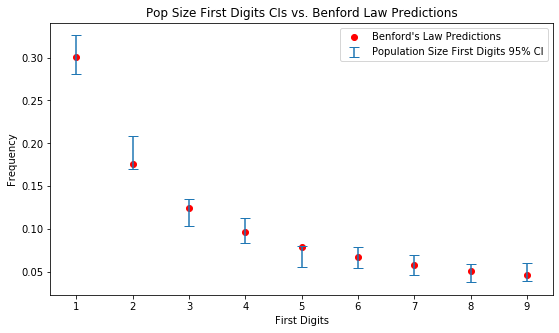

In [80]:
plot_multi_proportion_confint_digits(
    actual_first_digit_frequencies = first_digits_frequencies,
    actual_first_digit_counts = actual_counts,
    expected_first_digit_frequencies = expected_frequencies,
    label_actual = 'Population Size First Digits',
    label_expected = 'Benford\'s Law Predictions',
    title = 'Pop Size First Digits CIs vs. Benford Law Predictions'
)

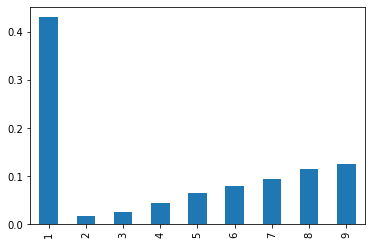

In [81]:
#Randomized normal numbers
np.random.seed(123)

uniform_sum = np.random.randint(1, 9, 10000) + np.random.randint(1, 9, 10000)

first_digit_uniform = pd.Series(uniform_sum).apply(first_digit)
uniform_first_digit_frequencies = first_digit_uniform.value_counts()/len(first_digit_uniform)
uniform_first_digit_frequencies.sort_index(inplace = True)

uniform_first_digit_frequencies.plot(kind = 'bar');

## Inka Khipu

In [82]:
khipu_cords = pd.read_pickle('khipu_cords.pkl')

khipu_cords.tail()

,Unnamed: 0,Khipu,Cord,Fiber,Value,Colors,Spin_Ply,Attachment,Termin,Length,Anomalous
56822,3146,UR294,1,CN,100,LB,Z,V,K,34.5,False
56823,3147,UR294,2,CN,22,MB,Z,V,B,22.5,False
56824,3148,UR294,3,CN,65,NB,Z,V,K,17.5,False
56825,3149,UR294,4,CN,52,W,Z,V,K,23.0,False
56826,3150,UR294,5,CN,0,MB\t (0-23) \r\nMB:W:BG\t (23-27) \r\nMB\t (27...,Z,V,K,40.5,False


In [83]:
first_digit_anomalous = khipu_cords[khipu_cords['Anomalous'] != False]['Value'].apply(first_digit)
first_digit_normal = khipu_cords[khipu_cords['Anomalous'] == False]['Value'].apply(first_digit)

first_digit_anomalous = first_digit_anomalous[first_digit_anomalous != 0]
first_digit_normal = first_digit_normal[first_digit_normal != 0]

In [84]:
anomalous_first_digit_freqs = first_digit_anomalous.value_counts()/len(first_digit_anomalous)
anomalous_first_digit_freqs.sort_index(inplace = True)

normal_first_digit_freqs = first_digit_normal.value_counts()/len(first_digit_normal)
normal_first_digit_freqs.sort_index(inplace = True)

In [85]:
freqs_cord_values = pd.DataFrame([anomalous_first_digit_freqs, 
                                  normal_first_digit_freqs,
                                  expected_frequencies,
                                  uniform_first_digit_frequencies]).T
freqs_cord_values.columns = ['Anomalous', 'Normal', 'Expected (Benford)',
                             'Expected (Uniform Sum)']
freqs_cord_values

,Anomalous,Normal,Expected (Benford),Expected (Uniform Sum)
1,0.329212,0.377575,0.301,0.4309
2,0.189332,0.198318,0.176,0.0176
3,0.113387,0.120762,0.125,0.0267
4,0.085129,0.095302,0.097,0.0447
5,0.060756,0.069059,0.079,0.0652
6,0.058637,0.051228,0.067,0.0794
7,0.053338,0.035941,0.058,0.0953
8,0.056164,0.030966,0.051,0.1149
9,0.054045,0.020849,0.046,0.1253


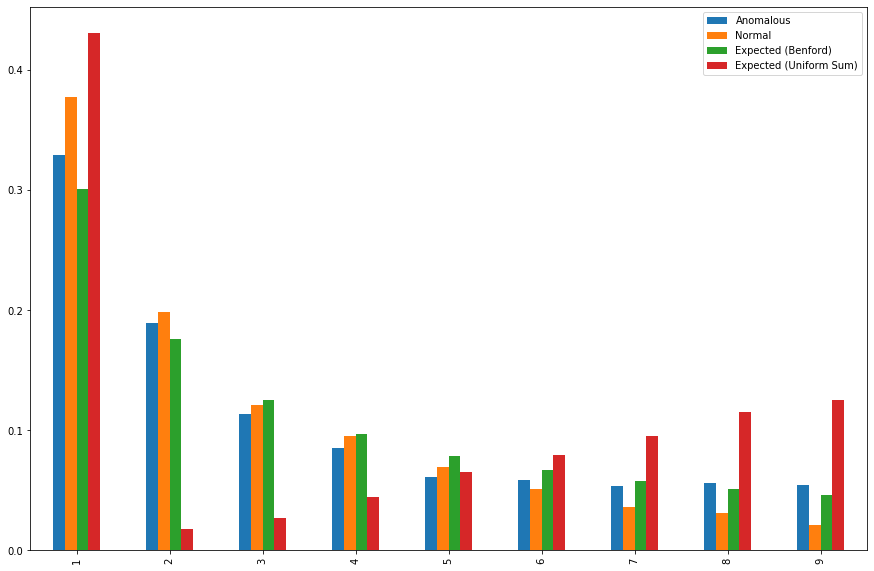

In [86]:
freqs_cord_values.plot(kind = 'bar', figsize = (15, 10));

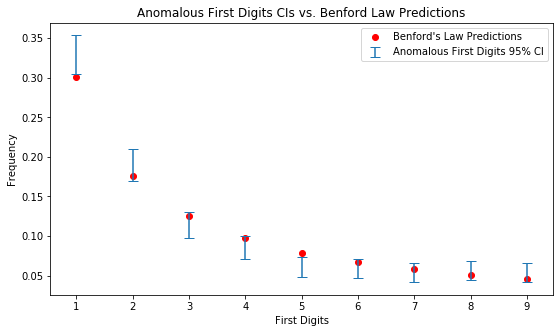

In [87]:
plot_multi_proportion_confint_digits(
    actual_first_digit_frequencies = anomalous_first_digit_freqs,
    actual_first_digit_counts = first_digit_anomalous.value_counts(),
    expected_first_digit_frequencies = expected_frequencies,
    label_actual = 'Anomalous First Digits',
    label_expected = 'Benford\'s Law Predictions',
    title = 'Anomalous First Digits CIs vs. Benford Law Predictions'
)

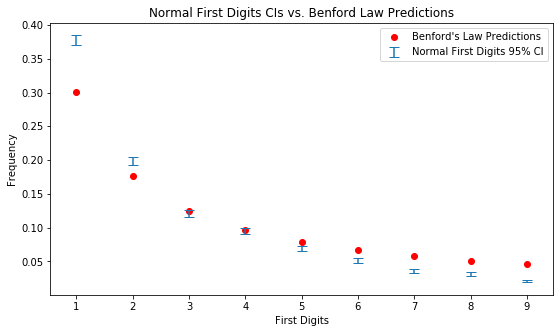

In [88]:
plot_multi_proportion_confint_digits(
    actual_first_digit_frequencies = normal_first_digit_freqs,
    actual_first_digit_counts = first_digit_normal.value_counts(),
    expected_first_digit_frequencies = expected_frequencies,
    label_actual = 'Normal First Digits',
    label_expected = 'Benford\'s Law Predictions',
    title = 'Normal First Digits CIs vs. Benford Law Predictions'
)